In [81]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#### Q1.




In [82]:
df1 = pd.read_excel('./PS4_Q1.xlsx').set_index('Date')
df1.head()

,CRSP VW,CRSP EW,AAPL,MMM
Date,,,,
1994-12-30,-0.007460,-0.050766,0.352002,0.014955
1995-12-29,0.356624,0.302198,-0.172954,0.284101
1996-12-31,0.211739,0.179174,-0.345098,0.332792
1998-01-30,0.242864,0.146928,0.101505,0.002061
1998-12-31,0.222445,-0.029128,2.119046,-0.109427


### a)

In [83]:
df1.describe().head(3)

,CRSP VW,CRSP EW,AAPL,MMM
count,30.000000,30.000000,30.000000,30.000000
mean,0.110446,0.117446,0.451342,0.097951
std,0.181728,0.235106,0.711521,0.213849


### b)

In [84]:
# without further assumption, I here assume data follow t-distribution
ci = df1.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=x.mean(), scale=stats.sem(x)), axis=0)
ci.index = ['LowerBound', 'UpperBound']
ci

,CRSP VW,CRSP EW,AAPL,MMM
LowerBound,0.042588,0.029656,0.185656,0.018098
UpperBound,0.178305,0.205236,0.717029,0.177803


#### Q2.

In [85]:
df2 = pd.read_excel('./PS4_Q2.xlsx')[['Date', 'Return']].set_index('Date')
df2.head()

,Return
Date,
2019-09-30,0.005282
2019-10-02,-0.001902
2019-10-03,0.002593
2019-10-04,-0.011141
2019-10-08,0.002799


### a)

In [86]:
autocorrelations = acf(df2, nlags=15)
lags = np.arange(1, 16)
rou_tau = autocorrelations[1:16]
i = list(range(1,16))
df_rou_tau = pd.DataFrame([rou_tau])
df_rou_tau.columns = i
df_rou_tau.index =['Lag']
df_rou_tau

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Lag,0.008164,-0.033768,-0.029651,0.049816,-0.002313,-0.05948,0.007666,0.028916,-0.030038,0.014689,-0.001935,-0.027914,-0.00854,-0.02632,-0.02354


In [87]:

#Largest and smallest autocorrelation
largest_lag = lags[np.argmax(rou_tau)]
smallest_lag = lags[np.argmin(rou_tau)]

# print(f"Lag with the largest autocorrelation: {largest_lag}, Value: {max(rou_tau)}")
# print(f"Lag with the smallest autocorrelation: {smallest_lag}, Value: {min(rou_tau)}")

Lag with the largest autocorrelation: 4, Value: 0.04981573551628648
Lag with the smallest autocorrelation: 6, Value: -0.05948033466132625


The daily returns have very little correlation with their past values over these lags.

### b)

#### r^2 Autocorrelation:

In [88]:
autocorrelations_squared = acf(df2**2, nlags=15)
lags = np.arange(1, 16)
rou_tau_squared = autocorrelations_squared[1:16]
i = list(range(1,16))
df_rou_tau_squared = pd.DataFrame([rou_tau_squared])
df_rou_tau_squared.columns = i
df_rou_tau_squared.index =['Lag']
df_rou_tau_squared

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Lag,0.260891,0.211435,0.104203,0.11064,0.083497,0.123918,0.094147,0.102059,0.05201,0.074401,-0.005973,0.050352,0.055185,0.129214,-0.010453


#### |r| Autocorrelation:

In [89]:
autocorrelations_abs = acf(np.abs(df2), nlags=15)
lags = np.arange(1, 16)
rou_tau_abs = autocorrelations_abs[1:16]
i = list(range(1,16))
df_rou_tau_abs = pd.DataFrame([rou_tau_abs])
df_rou_tau_abs.columns = i
df_rou_tau_abs.index =['Lag']
df_rou_tau_abs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Lag,0.099666,0.161714,0.104316,0.131333,0.068538,0.144569,0.080757,0.10786,0.029634,0.089132,0.00826,0.049854,0.059805,0.102908,0.008586


Lag 1 of squared return is 0.260891, which is significantly higher than any of the rest's autocorrelations. 

Lag 2 (0.161714) and lag 6 (0.144569) of absolute return show moderate autocorrelation, indicating persistence in the magnitude of returns.

These show the volatility cluster, maybe the returns are not i.i.d

### c)

In [138]:
n = len(df2)
r = autocorrelations[1]

z_alpha = stats.norm.ppf(1 - (1 - 0.99) / 2)
standard_error = np.sqrt((1 - r**2) / (n - 2))
lower_limit = ( - z_alpha * standard_error)
upper_limit = ( + z_alpha * standard_error)
print(f'The 99% CI is [{lower_limit}, {upper_limit}]')

The 99% CI is [-0.07353266807717379, 0.07353266807717379]


$$r \sim N\left(0, \sqrt{\frac{1 - r^2}{n - 2}}\right)$$
$$-0.07353 \leq \frac{r}{\sqrt{1 - r^2}} \leq 0.073533$$

From the calculation above, we have at least 99% confidence to say the returns are i.i.d

### d)

In [139]:
n = len(df2)
r = autocorrelations_squared[1]

z_alpha = stats.norm.ppf(1 - (1 - 0.99) / 2)
standard_error = np.sqrt((1 - r**2) / (n - 2))
lower_limit = (- z_alpha * standard_error)
upper_limit = (+ z_alpha * standard_error)
print(f'The 99% CI is [{lower_limit}, {upper_limit}]')

The 99% CI is [-0.0709884705193573, 0.0709884705193573]


$$-0.070988 \leq \frac{r}{\sqrt{1 - r^2}} \leq 0.070988$$

Since the correlation is significantly high, I think the lag 1 squared returns are not i.i.d

### e)

In [92]:
k = 15
alpha =0.01
lower_bound = stats.chi2.ppf(alpha / 2, df=k)
upper_bound = stats.chi2.ppf(1 - alpha / 2, df=k)
print(f'The 99% CI is [{lower_bound}, {upper_bound}]')

The 99% CI is [4.60091557172734, 32.80132064579183]


$$4.60092 \leq Q_{k} \leq 32.80132$$

### f)

In [135]:
Q_r = n*np.sum(autocorrelations[1:]**2)
print('returns Ljung-Boxs Q: ', Q_r)

returns Ljung-Boxs Q:  15.02659437805856


The estimate of Qk for returns falls in this confidence interval

In [136]:
Q_r = n*np.sum(autocorrelations_squared[1:]**2)
print('returns Ljung-Boxs Q: ', Q_r)

returns Ljung-Boxs Q:  255.80134469532626


The estimate of Qk for returns does not fall in this confidence interval

In [137]:
Q_r = n*np.sum(autocorrelations_abs[1:]**2)
print('returns Ljung-Boxs Q: ', Q_r)

returns Ljung-Boxs Q:  164.17590105647722


The estimate of Qk for returns does not fall in this confidence interval

### g)

From above, the returns do not follow the assumption of i.i.d

#### Q3.

In [96]:
p = np.array([0.1, 0.8, 0.1])
r_A = np.array([-1.0, 0.5, 0.5])
r_B = np.array([0.15, 0.15, 1.65])

### a)

In [97]:
mean_A = np.sum(p * r_A)
mean_B = np.sum(p * r_B)
cov = np.sum(p * r_A * r_B) - mean_A * mean_B
var_A = np.sum(p * ((r_A-mean_A) **2))
var_B = np.sum(p * ((r_B-mean_B) **2))
print(f'mean of A is {round(mean_A,4)}, variance of A is {round(var_A,4)}')
print(f'mean of B is {round(mean_B,4)}, variance of A is {round(var_B,4)}')
print(f'covariance between A and B: {round(cov,4)}')

mean of A is 0.35, variance of A is 0.2025
mean of B is 0.3, variance of A is 0.2025
covariance between A and B: 0.0225


### b)

In [98]:
w_A = np.arange(-1, 2.01, 0.01)
w_B = 1 - w_A

mean_p = w_A * mean_A + w_B * mean_B
std_p = np.sqrt(w_A**2 * var_A + w_B**2 * var_B + 2 * w_A * w_B * cov)
df3 = pd.DataFrame([mean_p, std_p, w_A])
df3.index = ['μ','σ', 'w_A']
df3

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
μ,0.250000,0.250500,0.251000,0.251500,0.252000,0.252500,0.25300,0.25350,0.254000,0.254500,...,0.395500,0.396000,0.39650,0.39700,0.397500,0.398000,0.398500,0.399000,0.399500,0.400000
σ,0.960469,0.954849,0.949233,0.943623,0.938017,0.932416,0.92682,0.92123,0.915644,0.910064,...,0.910064,0.915644,0.92123,0.92682,0.932416,0.938017,0.943623,0.949233,0.954849,0.960469
w_A,-1.000000,-0.990000,-0.980000,-0.970000,-0.960000,-0.950000,-0.94000,-0.93000,-0.920000,-0.910000,...,1.910000,1.920000,1.93000,1.94000,1.950000,1.960000,1.970000,1.980000,1.990000,2.000000


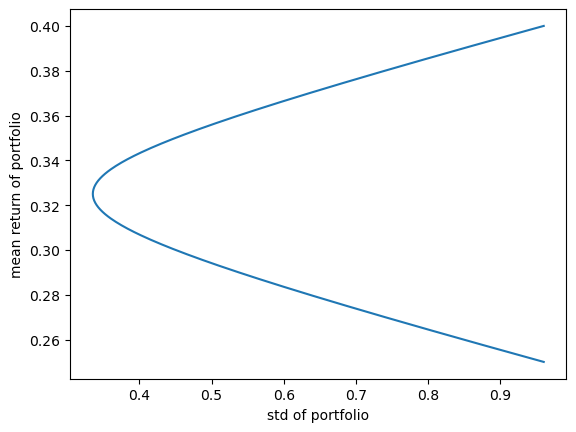

In [133]:
plt.plot(std_p, mean_p)
plt.xlabel('std of portfolio')
plt.ylabel('mean return of portfolio')
plt.show()

### c)

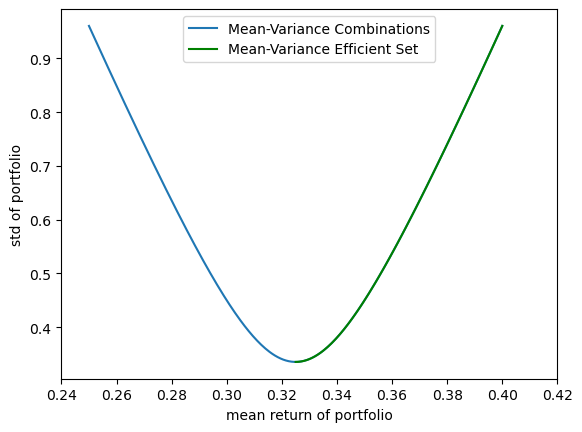

In [121]:
plt.plot(mean_p, std_p, label='Mean-Variance Combinations')
plt.plot(mean_p[150:], std_p[150:], color='green', label = 'Mean-Variance Efficient Set')
plt.xlabel('mean return of portfolio')
plt.ylabel('std of portfolio')
plt.xlim([0.24,0.42])
plt.legend()
plt.show()

### d)

In [102]:
tmp = df3.transpose().sort_values('μ',ascending= False)
tmp

,μ,σ,w_A
300,0.4000,0.960469,2.00
299,0.3995,0.954849,1.99
298,0.3990,0.949233,1.98
297,0.3985,0.943623,1.97
296,0.3980,0.938017,1.96
...,...,...,...
4,0.2520,0.938017,-0.96
3,0.2515,0.943623,-0.97
2,0.2510,0.949233,-0.98
1,0.2505,0.954849,-0.99


A and B have the same variance, while A has larger mean. The efficient frontier of the mean-variance plot is always the upper half of the curve. We can see from the data frame, there is always a larger weighted A in the portfolio because it is safer and gains more. Therefore, B is mean-variance dominated by A.

#### Q4.

### a)

In [103]:
df4 = pd.read_excel('./PS4_Q4.xls', index_col= 0,header = 1)
del df4['Unnamed: 10']
df4.describe().head(3)

,"Fairfield Sentry (a Madoff ""feeder fund"")",S&P 500 Index (w/dividends reinvested),NYSE value-weighted (w/dividends reinvested),NASDAQ value-weighted (w/dividends reinvested),NYSE small stocks (mkt. cap. decile 1),NYSE large stocks (mkt. cap. decile 10),HFRI Equity Market Neutral Index,HFRI Fixed Income: High Yield Index,1-month LIBOR (per month),Fairfield Sentry Excess Return,S&P 500 Excess Return
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,0.009559,0.008382,0.010245,0.013109,0.015647,0.009677,0.007175,0.009132,0.003492,0.006067,0.004890
std,0.007570,0.040907,0.037170,0.073916,0.048519,0.038178,0.009301,0.015679,0.001507,0.007326,0.040763


In [104]:
corr = df4['Fairfield Sentry (a Madoff "feeder fund")'].corr(df4['S&P 500 Index (w/dividends reinvested)'])
print(f'the correlation ρ is {corr}')

the correlation ρ is 0.30132633724872726


### b)

In [105]:
def mean_var(mean_A, mean_B, std_A, std_B, corr):
    w_A = np.arange(-1, 2.01, 0.01)
    w_B = 1 - w_A

    mean_p = w_A * mean_A + w_B * mean_B
    std_p = np.sqrt(w_A**2 * std_A**2 + w_B**2 * std_B**2 + 2 * w_A * w_B * std_A * std_B *corr)
    return mean_p, std_p

In [106]:
security1 = 'Fairfield Sentry (a Madoff "feeder fund")'
mean_fs = df4.describe()[security1].iloc[1]
std_fs = df4.describe()[security1].iloc[2]

security2 = 'S&P 500 Index (w/dividends reinvested)'
mean_sp = df4.describe()[security2].iloc[1]
std_sp = df4.describe()[security2].iloc[2]

rf = 0.0033

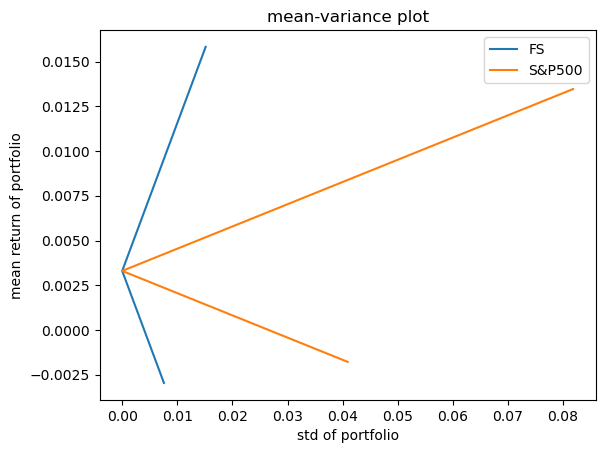

In [107]:
mean_p1, std_p1 = mean_var(mean_fs, rf, std_fs, 0, 0)
mean_p2, std_p2 = mean_var(mean_sp, rf, std_sp, 0, 0)
plt.plot(std_p1, mean_p1, label = 'FS', )
plt.plot(std_p2, mean_p2, label = 'S&P500')
plt.xlabel('std of portfolio')
plt.ylabel('mean return of portfolio')
plt.title('mean-variance plot')
plt.legend()
plt.show()

### c)

In [108]:
def neg_sharpe(param, mean_A, mean_B, std_A, std_B, corr):
    rf = 0.0033
    mean_p = param * mean_A + (1-param) * mean_B
    std_p = np.sqrt(param**2 * std_A**2 + (1-param)**2 * std_B**2 + 2 * param * (1-param) * std_A * std_B *corr)
    sharpe_ratio = (mean_p-rf)/std_p
    return -sharpe_ratio

In [109]:
initial_param = 0.5
bounds = [(-1, 2)]

result = minimize(neg_sharpe, initial_param, args=(mean_fs, mean_sp, std_fs, std_sp, corr), 
                  method='SLSQP', bounds=bounds)
print(f'Optimal weight of Fairfield Sentry is {float(result.x[0])}, and optimal weight of S&P 500 Index is {1- float(result.x[0])}' )

Optimal weight of Fairfield Sentry is 1.030240648822359, and optimal weight of S&P 500 Index is -0.030240648822358995


### d)

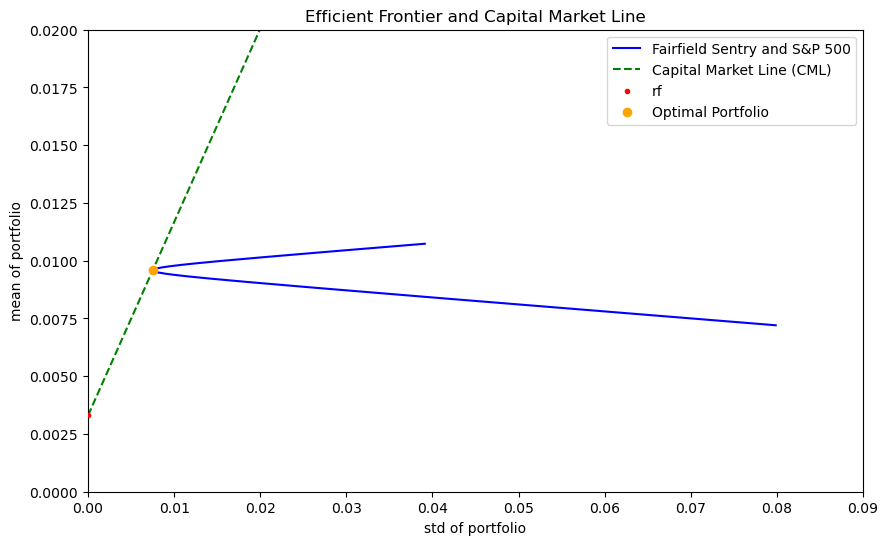

In [110]:
def optimal_portfolio(w, mean_fs, mean_sp, std_fs, std_sp):
    mean_p = w * mean_fs + (1 - w) * mean_sp
    std_p = np.sqrt(w**2 * std_fs**2 + (1 - w)**2 * std_sp**2 + 2 * w * (1 - w) * corr * std_fs * std_sp)
    return mean_p, std_p

optimal_mean, optimal_std = optimal_portfolio(float(result.x[0]), mean_fs, mean_sp, std_fs, std_sp)
port_means, port_stds = mean_var(mean_fs, mean_sp, std_fs, std_sp, corr)

cml_x = np.linspace(0, max(port_stds), 100)
cml_y = rf + (optimal_mean - rf) / optimal_std * cml_x

plt.figure(figsize=(10, 6))
plt.plot(port_stds, port_means, label='Fairfield Sentry and S&P 500', color='blue')
plt.plot(cml_x, cml_y, label='Capital Market Line (CML)', color='green', linestyle='--')
plt.scatter([0], [rf], color='red', marker='.', label='rf', zorder=5)
plt.scatter([optimal_std], [optimal_mean], color='orange', marker='o', label='Optimal Portfolio', zorder=5)

plt.title('Efficient Frontier and Capital Market Line')
plt.xlabel('std of portfolio')
plt.ylabel('mean of portfolio')
plt.legend()
plt.ylim([0,0.02])
plt.xlim([0,0.09])
plt.show()

### e)

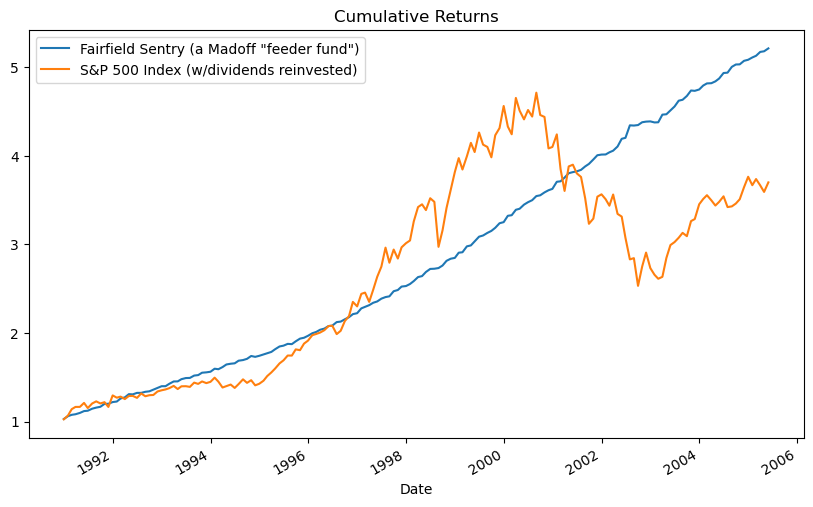

In [143]:
(1+df4[['Fairfield Sentry (a Madoff "feeder fund")', 'S&P 500 Index (w/dividends reinvested)']]).cumprod().plot(figsize=(10, 6))
plt.title('Cumulative Returns')
plt.show()

Purely from the historical data, we can see the fund of Fairfield Sentry had higher cumulative returns and lower volatility risk, better than the s&p500. It is quite addictive to invest. Without further information like what the company is, how the fund works, what are the underlying asset of the fund, I might invest all my money to this fund at that time. However, after doing more information research, the whole company was actually suspective and may crash oneday, so I would not have invested in Fairfield Sentry.